In [30]:
import shapely
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pylab as plt
from fiona.crs import from_epsg
import random
%matplotlib inline

1.

In [9]:
ct_shape = gpd.read_file('/home/cusp/kq320/PUIdata/nycb2010_16c/nycb2010.shp')

In [10]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.784296,1703.381058,"POLYGON ((963363.1166381836 167356.3334350586,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


2.

In [11]:
ct_latlon = ct_shape[ct_shape["BoroName"] == "Brooklyn"]
ct_latlon.crs = from_epsg(2263)
ct_latlon = ct_latlon.to_crs(epsg=4326)

In [12]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5175,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5176,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5177,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5178,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5179,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


3.

In [15]:
C = shapely.geometry.Point(-73.9866, 40.6931)

4.

In [16]:
for ct in enumerate(ct_latlon.geometry):
    if shapely.geometry.asShape(ct[1]).contains(C):
        print('CUSP is contained in ' + str(ct[1]))
        index = ct[0]

CUSP is contained in POLYGON ((-73.98622595691907 40.69308831340506, -73.98627231669104 40.69219479463375, -73.98729894947923 40.69223407539822, -73.98725396415627 40.6931249027317, -73.98622595691907 40.69308831340506))


5.

In [18]:
ct_cusp = gpd.GeoDataFrame(ct_latlon.iloc[index,:]).T

In [40]:
array = np.random.randint(len(ct_latlon), size= len(ct_latlon)/10)
ct = ct_latlon.iloc[array,:]

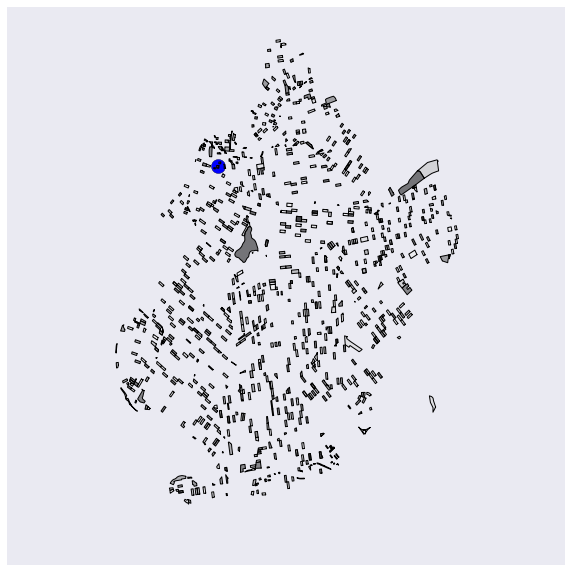

In [42]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.scatter(-73.9866, 40.6931, s=200)
ct.plot(ax=ax)
ct_cusp.plot(color="red", ax=ax)
plt.show()